In [55]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

In [1]:
data = pd.read_csv(r"C:\Users\Krupa\Documents\Krups Coding\Kaggle\DA_CO2emissions\co2emissions.csv")
data.head()

,Country,ISO 3166-1 alpha-3,Year,Total,Coal,Oil,Gas,Cement,Flaring,Other,Per Capita
0,Afghanistan,AFG,1750,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Afghanistan,AFG,1751,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Afghanistan,AFG,1752,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Afghanistan,AFG,1753,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Afghanistan,AFG,1754,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


The data is organized using the following columns: 
- Country (the name of the country)
- ISO 3166-1 alpha-3 (the three letter code for the country)
- Year (the year of survey data)
- Total (the total amount of CO2 emitted by the country in that year)
- Coal (amount of CO2 emitted by coal in that year)
- Oil (amount emitted by oil) 
- Gas (amount emitted by gas) 
- Cement (amount emitted by cement)
- Flaring (flaring emission levels ) 
- Other (other forms such as industrial processes )
- Per Capita which provides an insight into how much personal carbon dioxide emission is present in each Country per individual 


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 63104 entries, 0 to 63103
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Country             63104 non-null  object 
 1   ISO 3166-1 alpha-3  61472 non-null  object 
 2   Year                63104 non-null  int64  
 3   Total               62904 non-null  float64
 4   Coal                21744 non-null  float64
 5   Oil                 21717 non-null  float64
 6   Gas                 21618 non-null  float64
 7   Cement              20814 non-null  float64
 8   Flaring             21550 non-null  float64
 9   Other               1620 non-null   float64
 10  Per Capita          18974 non-null  float64
dtypes: float64(8), int64(1), object(2)
memory usage: 5.3+ MB


In [5]:
data.shape

(63104, 11)

In [6]:
data.describe()

,Year,Total,Coal,Oil,Gas,Cement,Flaring,Other,Per Capita
count,63104.000000,62904.000000,21744.000000,21717.000000,21618.000000,20814.000000,21550.000000,1620.000000,18974.000000
mean,1885.500000,55.224788,73.968916,55.760624,23.504285,4.330443,1.712695,10.951389,4.413363
std,78.519728,824.845435,598.986992,519.034563,247.674772,50.305770,16.727067,39.034073,17.432815
min,1750.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1817.750000,0.000000,0.000000,0.091600,0.000000,0.000000,0.000000,0.520885,0.197866
50%,1885.500000,0.000000,0.271852,1.044240,0.000000,0.022756,0.000000,1.255329,1.303949
75%,1953.250000,0.549342,6.736411,8.339752,0.581628,0.568502,0.000000,4.385471,5.077994
max,2021.000000,37123.850352,15051.512770,12345.653374,7921.829472,1672.592372,439.253991,306.638573,834.192642


In [9]:
def check_data(df):
    summary = [
        [col, df[col].dtype, df[col].count(), df[col].nunique(), df[col].isnull().sum(), df.duplicated().sum()]
        for col in df.columns] 
    
    df_check = pd.DataFrame(summary, columns = ['column', 'dtype', 'instances', 'unique', 'missing_vals', 'duplicates'])
    
    return df_check 

In [10]:
check_data(data)

,column,dtype,instances,unique,missing_vals,duplicates
0,Country,object,63104,232,0,0
1,ISO 3166-1 alpha-3,object,61472,225,1632,0
2,Year,int64,63104,272,0,0
3,Total,float64,62904,16193,200,0
4,Coal,float64,21744,10833,41360,0
5,Oil,float64,21717,11734,41387,0
6,Gas,float64,21618,6443,41486,0
7,Cement,float64,20814,9119,42290,0
8,Flaring,float64,21550,3578,41554,0
9,Other,float64,1620,1519,61484,0


In [86]:
# change date col from int to datetime
def convert_to_datetime(df, column_name):
    try: 
        df[column_name] = pd.to_datetime(df[column_name], format = "%Y")
        return df
    except Exception as e:
        print(f"Error: {e}")
        return None 

In [87]:
convert_to_datetime(data, 'Year')

,Country,ISO 3166-1 alpha-3,Year,Total,Coal,Oil,Gas,Cement,Flaring,Other,Per Capita
0,Afghanistan,AFG,1750-01-01,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,Afghanistan,AFG,1751-01-01,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2,Afghanistan,AFG,1752-01-01,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3,Afghanistan,AFG,1753-01-01,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
4,Afghanistan,AFG,1754-01-01,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...
63099,Global,WLD,2017-01-01,36096.739276,14506.973805,12242.627935,7144.928128,1507.923185,391.992176,302.294047,4.749682
63100,Global,WLD,2018-01-01,36826.506600,14746.830688,12266.016285,7529.846784,1569.218392,412.115746,302.478706,4.792753
63101,Global,WLD,2019-01-01,37082.558969,14725.978025,12345.653374,7647.528220,1617.506786,439.253991,306.638573,4.775633
63102,Global,WLD,2020-01-01,35264.085734,14174.564010,11191.808551,7556.290283,1637.537532,407.583673,296.301685,4.497423


In [ ]:
# questions to ask ourselves 

# 1. how have the emissions changed over time for coal, oil, gas, cement, flaring, other 
# 2. what can we forecast for the next 5-10 years? 
# 3. who are the top contributors to emissions for coal, oil, gas, cement, flaring,other (overall)
# 4. are there any correlations?
# 5. plot total avg. emissions by top 10 countries 
# 6. global plots chloropleth? 


In [11]:
print('Missing values (%) per field:\n', 100*data.isnull().mean())

Missing values (%) per field:
 Country                0.000000
ISO 3166-1 alpha-3     2.586207
Year                   0.000000
Total                  0.316937
Coal                  65.542596
Oil                   65.585383
Gas                   65.742267
Cement                67.016354
Flaring               65.850025
Other                 97.432809
Per Capita            69.932175
dtype: float64


A large percentage of values are missing from this dataset, let's assume these values are zero. 

In [12]:
data.fillna(0, inplace=True)

In [13]:
data.head()

,Country,ISO 3166-1 alpha-3,Year,Total,Coal,Oil,Gas,Cement,Flaring,Other,Per Capita
0,Afghanistan,AFG,1750,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,Afghanistan,AFG,1751,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,Afghanistan,AFG,1752,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,Afghanistan,AFG,1753,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,Afghanistan,AFG,1754,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [14]:
print('Missing values (%) per field:\n', 100*data.isnull().mean())

Missing values (%) per field:
 Country               0.0
ISO 3166-1 alpha-3    0.0
Year                  0.0
Total                 0.0
Coal                  0.0
Oil                   0.0
Gas                   0.0
Cement                0.0
Flaring               0.0
Other                 0.0
Per Capita            0.0
dtype: float64


In [16]:
#let's take a closer look at the ISO column 
data.columns

Index(['Country', 'ISO 3166-1 alpha-3', 'Year', 'Total', 'Coal', 'Oil', 'Gas',
       'Cement', 'Flaring', 'Other', 'Per Capita'],
      dtype='object')

In [17]:
data['ISO 3166-1 alpha-3'].unique()

array(['AFG', 'ALB', 'DZA', 'AND', 'AGO', 'AIA', 'ATA', 'ATG', 'ARG',
       'ARM', 'ABW', 'AUS', 'AUT', 'AZE', 'BHS', 'BHR', 'BGD', 'BRB',
       'BLR', 'BEL', 'BLZ', 'BEN', 'BMU', 'BTN', 'BES', 'BIH', 'BWA',
       'BRA', 'VGB', 'BRN', 'BGR', 'BFA', 'BDI', 'KHM', 'CAN', 'CPV',
       'CAF', 'TCD', 'CHL', 'CHN', 'CXR', 'COL', 'COM', 'COG', 'COK',
       'CRI', 'CIV', 'HRV', 'CUB', 'CUW', 'CYP', 'CZE', 'PRK', 'COD',
       'DNK', 'DJI', 'DMA', 'DOM', 'ECU', 'EGY', 'SLV', 'GNQ', 'ERI',
       'EST', 'ETH', 'FRO', 'FSM', 'FJI', 'FIN', 'PCZ', 'FRA', 0, 'GUF',
       'PYF', 'GAB', 'GMB', 'GEO', 'DEU', 'GHA', 'GRC', 'GRL', 'GRD',
       'GLP', 'GTM', 'GIN', 'GNB', 'GUY', 'HTI', 'HND', 'HKG', 'HUN',
       'ISL', 'IND', 'IDN', 'IRQ', 'IRL', 'IRN', 'ISR', 'ITA', 'JAM',
       'JPN', 'JOR', 'KAZ', 'KEN', 'KIR', 'KSV', 'KWT', 'KGZ', 'LAO',
       'LVA', 'LBN', 'LSO', 'LBR', 'LBY', 'LIE', 'LTU', 'LUX', 'MAC',
       'MKD', 'MDG', 'MWI', 'MYS', 'MDV', 'MLI', 'MLT', 'MHL', 'MTQ',
       'MRT', 'MU

In [19]:
data['ISO 3166-1 alpha-3'].nunique()

226

In [20]:
data['Country'].unique()

array(['Afghanistan', 'Albania', 'Algeria', 'Andorra', 'Angola',
       'Anguilla', 'Antarctica', 'Antigua and Barbuda', 'Argentina',
       'Armenia', 'Aruba', 'Australia', 'Austria', 'Azerbaijan',
       'Bahamas', 'Bahrain', 'Bangladesh', 'Barbados', 'Belarus',
       'Belgium', 'Belize', 'Benin', 'Bermuda', 'Bhutan',
       'Bonaire, Saint Eustatius and Saba', 'Bosnia and Herzegovina',
       'Botswana', 'Brazil', 'British Virgin Islands',
       'Brunei Darussalam', 'Bulgaria', 'Burkina Faso', 'Burundi',
       'Cambodia', 'Canada', 'Cape Verde', 'Central African Republic',
       'Chad', 'Chile', 'China', 'Christmas Island', 'Colombia',
       'Comoros', 'Congo', 'Cook Islands', 'Costa Rica', "Côte d'Ivoire",
       'Croatia', 'Cuba', 'Curaçao', 'Cyprus', 'Czech Republic',
       'North Korea', 'Democratic Republic of the Congo', 'Denmark',
       'Djibouti', 'Dominica', 'Dominican Republic', 'Ecuador', 'Egypt',
       'El Salvador', 'Equatorial Guinea', 'Eritrea', 'Estonia',
   

In [21]:
data['Country'].nunique()

232

The ratio of countries to ISO is unbalanced. There are 6 more countries than ISO's. This suggests some ISO's may be used multiple times, which makes sense as some Islands form part of countries.


In [23]:
data.loc[data['Country'] == 'International Transport']

,Country,ISO 3166-1 alpha-3,Year,Total,Coal,Oil,Gas,Cement,Flaring,Other,Per Capita
62560,International Transport,XIT,1750,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
62561,International Transport,XIT,1751,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
62562,International Transport,XIT,1752,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
62563,International Transport,XIT,1753,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
62564,International Transport,XIT,1754,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
62827,International Transport,XIT,2017,1230.506945,0.0,1230.506945,0.0,0.0,0.0,0.0,0.0
62828,International Transport,XIT,2018,1270.690768,0.0,1270.690768,0.0,0.0,0.0,0.0,0.0
62829,International Transport,XIT,2019,1249.558280,0.0,1249.558280,0.0,0.0,0.0,0.0,0.0
62830,International Transport,XIT,2020,938.508679,0.0,938.508679,0.0,0.0,0.0,0.0,0.0


In [24]:
data.loc[data['Country'] == 'Global']

,Country,ISO 3166-1 alpha-3,Year,Total,Coal,Oil,Gas,Cement,Flaring,Other,Per Capita
62832,Global,WLD,1750,9.350528,9.350528,0.000000,0.000000,0.000000,0.000000,0.000000,0.011492
62833,Global,WLD,1751,9.350528,9.350528,0.000000,0.000000,0.000000,0.000000,0.000000,0.011438
62834,Global,WLD,1752,9.354192,9.354192,0.000000,0.000000,0.000000,0.000000,0.000000,0.011390
62835,Global,WLD,1753,9.354192,9.354192,0.000000,0.000000,0.000000,0.000000,0.000000,0.011339
62836,Global,WLD,1754,9.357856,9.357856,0.000000,0.000000,0.000000,0.000000,0.000000,0.011294
...,...,...,...,...,...,...,...,...,...,...,...
63099,Global,WLD,2017,36096.739276,14506.973805,12242.627935,7144.928128,1507.923185,391.992176,302.294047,4.749682
63100,Global,WLD,2018,36826.506600,14746.830688,12266.016285,7529.846784,1569.218392,412.115746,302.478706,4.792753
63101,Global,WLD,2019,37082.558969,14725.978025,12345.653374,7647.528220,1617.506786,439.253991,306.638573,4.775633
63102,Global,WLD,2020,35264.085734,14174.564010,11191.808551,7556.290283,1637.537532,407.583673,296.301685,4.497423


It's unclear what global and internatioal transport refer to. For now, let's remove these rows from our analysis, and consider them separately.

In [38]:
world_data = data[(data['Country']=='Global') | (data['Country']=='International Transport')]
world_data.head()

,Country,ISO 3166-1 alpha-3,Year,Total,Coal,Oil,Gas,Cement,Flaring,Other,Per Capita
62560,International Transport,XIT,1750,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
62561,International Transport,XIT,1751,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
62562,International Transport,XIT,1752,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
62563,International Transport,XIT,1753,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
62564,International Transport,XIT,1754,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [39]:
world_data.shape

(544, 11)

## Filtered Data

In [89]:
#let's consider only the data from actual countries and from 2000 onwrds
filtered_data = data[(data['Country']!='Global') & (data['Country']!='International Transport') & (data['Year']>='2000')]
filtered_data.head()

,Country,ISO 3166-1 alpha-3,Year,Total,Coal,Oil,Gas,Cement,Flaring,Other,Per Capita
250,Afghanistan,AFG,2000-01-01,1.047128,0.003664,0.787760,0.223504,0.010216,0.021984,0.0,0.053581
251,Afghanistan,AFG,2001-01-01,1.069098,0.069616,0.762112,0.208848,0.006538,0.021984,0.0,0.054300
252,Afghanistan,AFG,2002-01-01,1.340995,0.055109,0.727438,0.547416,0.011033,0.000000,0.0,0.063856
253,Afghanistan,AFG,2003-01-01,1.559602,0.091813,0.991575,0.466408,0.009807,0.000000,0.0,0.068871
254,Afghanistan,AFG,2004-01-01,1.237247,0.091600,0.908672,0.227168,0.009807,0.000000,0.0,0.052529


In [90]:
filtered_data.shape

(5060, 11)

In [91]:
filtered_data['Country']

250      Afghanistan
251      Afghanistan
252      Afghanistan
253      Afghanistan
254      Afghanistan
            ...     
62555       Zimbabwe
62556       Zimbabwe
62557       Zimbabwe
62558       Zimbabwe
62559       Zimbabwe
Name: Country, Length: 5060, dtype: object

<Axes: title={'center': 'Top 10 Countries Total Emissions, 2000 - 2021'}>

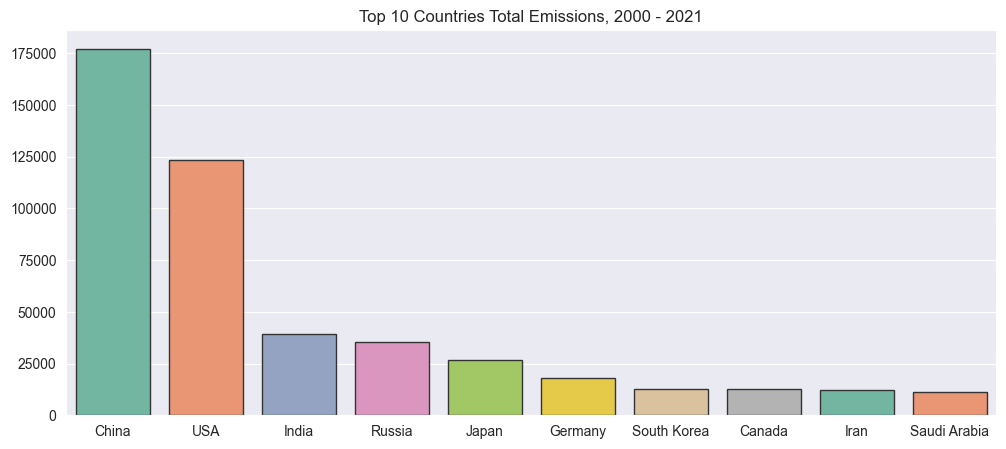

In [116]:
countries = list(filtered_data.drop(columns=['Year']).groupby('Country').sum().sort_values(by='Total',ascending=False).index)
values = list(filtered_data.drop(columns=['Year']).groupby('Country').sum().sort_values(by='Total',ascending=False)['Total'])

plt.figure(figsize=(12,5))
plt.title(label='Top 10 Countries Total Emissions, 2000 - 2021')
sns.set_style('darkgrid')
sns.barplot(x=countries[:10], y=values[:10], hue = countries[:10], palette='Set2',edgecolor='.2', legend='auto')

In [93]:
#let's take a closer look at China over time 
china_data = filtered_data[filtered_data['Country']=='China']
china_data

,Country,ISO 3166-1 alpha-3,Year,Total,Coal,Oil,Gas,Cement,Flaring,Other,Per Capita
10858,China,CHN,2000-01-01,3644.464203,2601.736784,648.685552,59.796480,244.388200,0.000000,89.857187,2.883053
10859,China,CHN,2001-01-01,3723.730766,2637.654976,659.300160,67.157456,270.828174,0.000000,88.790000,2.925760
10860,China,CHN,2002-01-01,4112.459057,3018.634032,653.086016,53.992704,296.590305,0.000000,90.156000,3.210536
10861,China,CHN,2003-01-01,4827.445998,3601.712000,727.098816,60.745456,345.186136,0.000000,92.703590,3.745477
10862,China,CHN,2004-01-01,5223.754656,3835.288336,839.092640,71.521280,379.992160,0.000000,97.860240,4.028136
10863,China,CHN,2005-01-01,5876.555340,4424.389920,850.172576,84.957168,411.648776,0.000000,105.386900,4.503496
10864,China,CHN,2006-01-01,6488.803816,4905.374192,898.533712,103.753488,470.086624,0.000000,111.055800,4.941642
10865,China,CHN,2007-01-01,6978.611952,5289.903664,927.351072,129.515072,514.980844,0.000000,116.861300,5.280773
10866,China,CHN,2008-01-01,7496.832207,5729.473744,970.117280,149.674400,525.924483,0.000000,121.642300,5.636008
10867,China,CHN,2009-01-01,7886.532768,6028.500112,982.347712,164.403680,583.560264,0.000000,127.721000,5.889315


Text(0.5, 1.0, 'China Total Emissions Trend, 2000 - 2021')

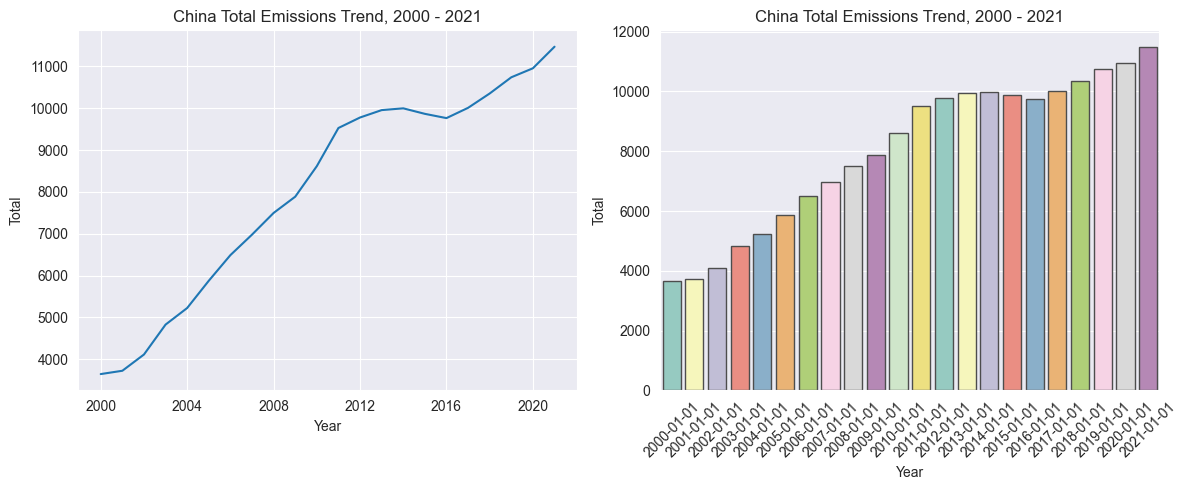

In [94]:
plt.figure(figsize=(12,5))
plt.subplot(121)
sns.lineplot(x='Year', y ='Total', data=china_data)
plt.title(label='China Total Emissions Trend, 2000 - 2021')

plt.subplot(122)
sns.barplot(x='Year', y='Total', data=china_data, hue='Year', palette='Set3', edgecolor='.3', legend=False)
plt.xticks(rotation=45)
plt.tight_layout()
plt.title(label='China Total Emissions Trend, 2000 - 2021')


In [95]:
filtered_data.columns

Index(['Country', 'ISO 3166-1 alpha-3', 'Year', 'Total', 'Coal', 'Oil', 'Gas',
       'Cement', 'Flaring', 'Other', 'Per Capita'],
      dtype='object')

In [110]:
#let's consider the average annual emissions for all categories
filtered_df = filtered_data.copy()
filtered_df.set_index('Year', inplace=True)

In [120]:
annual_avg =filtered_df[['Total', 'Coal', 'Oil', 'Gas', 'Cement', 'Flaring', 'Other']].resample('Y').mean().round(2)
annual_avg

,Total,Coal,Oil,Gas,Cement,Flaring,Other
Year,,,,,,,
2000-12-31,107.26,40.01,41.38,20.57,3.14,1.21,0.94
2001-12-31,108.21,40.24,41.79,20.75,3.28,1.22,0.93
2002-12-31,110.80,42.08,41.69,21.33,3.46,1.30,0.94
2003-12-31,116.61,45.73,42.82,22.09,3.71,1.30,0.96
2004-12-31,120.58,47.27,44.08,22.86,3.96,1.41,1.00
2005-12-31,124.66,50.19,44.33,23.39,4.19,1.50,1.05
2006-12-31,128.69,52.99,44.57,23.94,4.57,1.51,1.10
2007-12-31,132.41,55.55,44.48,24.76,4.91,1.58,1.13
2008-12-31,134.89,57.36,44.30,25.50,4.97,1.63,1.13


In [181]:
annual_avg['% Coal'] = (annual_avg['Coal']/annual_avg['Total'])*100
annual_avg['% Oil'] = (annual_avg['Oil']/annual_avg['Total'])*100
annual_avg['% Gas'] = (annual_avg['Gas']/annual_avg['Total'])*100
annual_avg['% Cement'] = (annual_avg['Cement']/annual_avg['Total'])*100
annual_avg['% Flaring'] = (annual_avg['Flaring']/annual_avg['Total'])*100
annual_avg['% Other'] = (annual_avg['Other']/annual_avg['Total'])*100

In [185]:
annual_avg = annual_avg.round(2)
annual_avg

,Total,Coal,Oil,Gas,Cement,Flaring,Other,% Coal,% Oil,% Gas,% Cement,% Flaring,% Other
Year,,,,,,,,,,,,,
2000-12-31,107.26,40.01,41.38,20.57,3.14,1.21,0.94,37.30,38.58,19.18,2.93,1.13,0.88
2001-12-31,108.21,40.24,41.79,20.75,3.28,1.22,0.93,37.19,38.62,19.18,3.03,1.13,0.86
2002-12-31,110.80,42.08,41.69,21.33,3.46,1.30,0.94,37.98,37.63,19.25,3.12,1.17,0.85
2003-12-31,116.61,45.73,42.82,22.09,3.71,1.30,0.96,39.22,36.72,18.94,3.18,1.11,0.82
2004-12-31,120.58,47.27,44.08,22.86,3.96,1.41,1.00,39.20,36.56,18.96,3.28,1.17,0.83
2005-12-31,124.66,50.19,44.33,23.39,4.19,1.50,1.05,40.26,35.56,18.76,3.36,1.20,0.84
2006-12-31,128.69,52.99,44.57,23.94,4.57,1.51,1.10,41.18,34.63,18.60,3.55,1.17,0.85
2007-12-31,132.41,55.55,44.48,24.76,4.91,1.58,1.13,41.95,33.59,18.70,3.71,1.19,0.85
2008-12-31,134.89,57.36,44.30,25.50,4.97,1.63,1.13,42.52,32.84,18.90,3.68,1.21,0.84


In [191]:
annual_avg.loc[annual_avg['% Oil'] > annual_avg['% Coal']]

,Total,Coal,Oil,Gas,Cement,Flaring,Other,% Coal,% Oil,% Gas,% Cement,% Flaring,% Other
Year,,,,,,,,,,,,,
2000-12-31,107.26,40.01,41.38,20.57,3.14,1.21,0.94,37.30,38.58,19.18,2.93,1.13,0.88
2001-12-31,108.21,40.24,41.79,20.75,3.28,1.22,0.93,37.19,38.62,19.18,3.03,1.13,0.86


In [196]:
annual_avg.loc[annual_avg['% Gas'] > annual_avg['% Oil']]

,Total,Coal,Oil,Gas,Cement,Flaring,Other,% Coal,% Oil,% Gas,% Cement,% Flaring,% Other
Year,,,,,,,,,,,,,


There appears to only be two years when Oil carbon emissions were higher than Coal carbon emissions, and that was in 2000 and 2001.

Text(0.5, 1.0, 'Annual Average Emissions, 2000 - 2021')

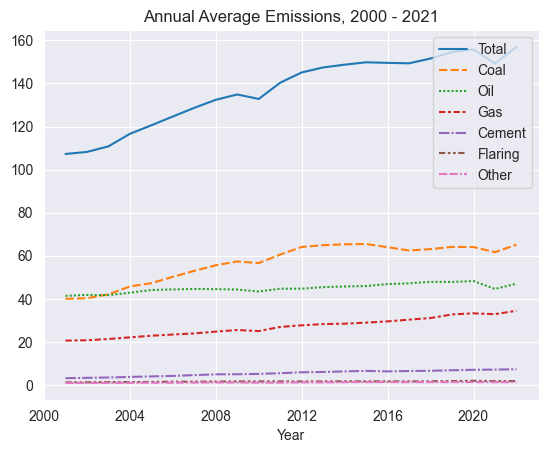

In [109]:
sns.lineplot(data=annual_avg)
plt.title(label='Annual Average Emissions, 2000 - 2021')

The above graph indicates that coal, followed by oil and gas are on average the top emittors of carbon.Between 2020 and 2021 there is a slight dip due to the pandemic. Other than that, there seems to be a steady increase across the board. 

In [143]:
full_countries_data = data[(data['Country']!='Global') & (data['Country']!='International Transport')]
full_countries_data.shape


(62560, 11)

In [148]:
full_countries_data.head()

,Country,ISO 3166-1 alpha-3,Year,Total,Coal,Oil,Gas,Cement,Flaring,Other,Per Capita
0,Afghanistan,AFG,1750-01-01,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,Afghanistan,AFG,1751-01-01,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,Afghanistan,AFG,1752-01-01,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,Afghanistan,AFG,1753-01-01,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,Afghanistan,AFG,1754-01-01,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [160]:
full_countries_data['Country'].nunique()

230

In [144]:
full_countries_df = full_countries_data.copy()
full_countries_df.set_index('Year', inplace=True)
annual_avg_full_data = full_countries_df[['Total', 'Coal', 'Oil', 'Gas', 'Cement', 'Flaring', 'Other']].resample('Y').mean().round(2)


Text(0.5, 1.0, 'Annual Average Emissions')

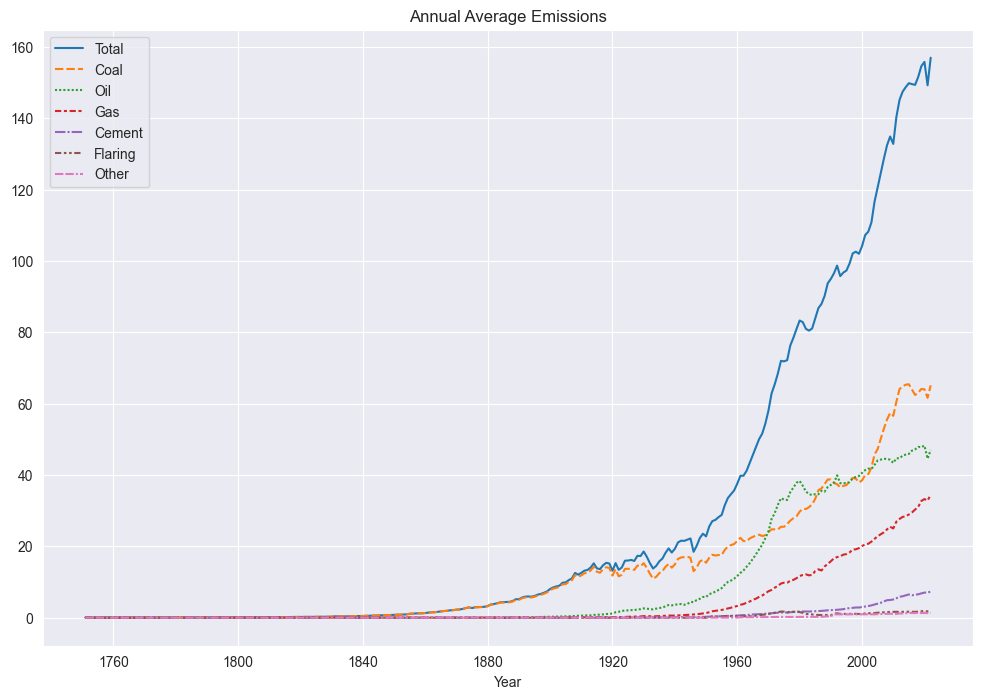

In [147]:
plt.figure(figsize=(12,8))
sns.lineplot(data=annual_avg_full_data)
plt.title(label='Annual Average Emissions')

In [156]:
df_1920 = full_countries_data[full_countries_data['Year']>='1920-01-01']
df_1920

,Country,ISO 3166-1 alpha-3,Year,Total,Coal,Oil,Gas,Cement,Flaring,Other,Per Capita
170,Afghanistan,AFG,1920-01-01,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.000000
171,Afghanistan,AFG,1921-01-01,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.000000
172,Afghanistan,AFG,1922-01-01,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.000000
173,Afghanistan,AFG,1923-01-01,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.000000
174,Afghanistan,AFG,1924-01-01,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.000000
...,...,...,...,...,...,...,...,...,...,...,...
62555,Zimbabwe,ZWE,2017-01-01,9.596071,5.900452,3.226752,0.0,0.468867,0.0,0.0,0.650533
62556,Zimbabwe,ZWE,2018-01-01,11.795478,7.177776,4.059712,0.0,0.557990,0.0,0.0,0.783639
62557,Zimbabwe,ZWE,2019-01-01,11.114607,6.888320,3.656672,0.0,0.569615,0.0,0.0,0.723861
62558,Zimbabwe,ZWE,2020-01-01,10.607897,6.721571,3.316712,0.0,0.569615,0.0,0.0,0.676970


<Axes: title={'center': 'Per Capita Emissions Trend, 1920 - 2021'}, xlabel='Year', ylabel='Per Capita'>

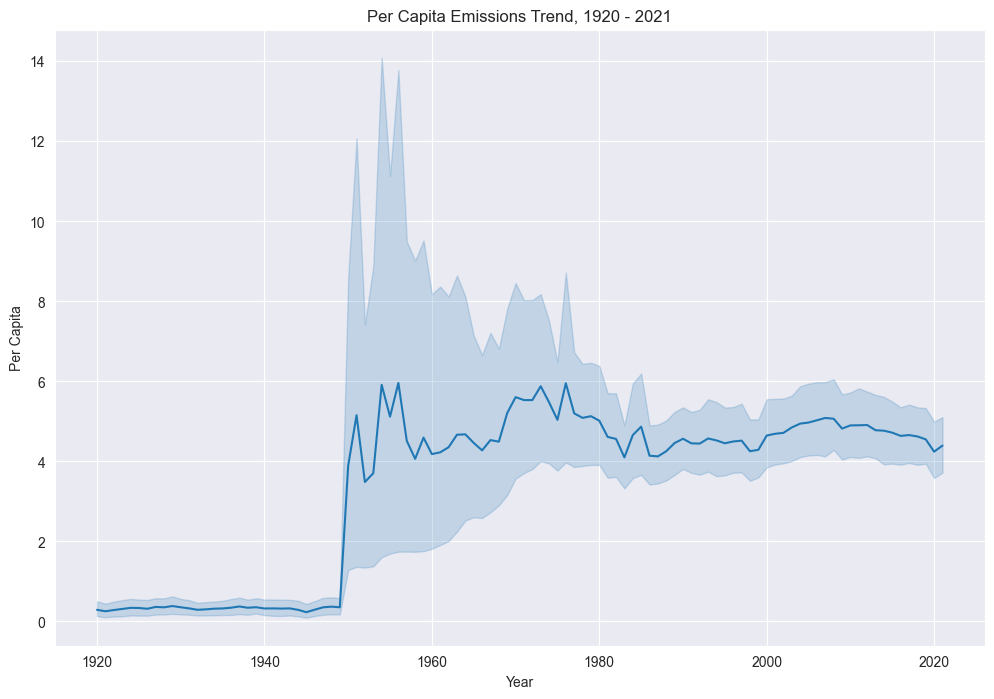

In [165]:
plt.figure(figsize=(12,8))
plt.title(label='Per Capita Emissions Trend, 1920 - 2021')
sns.lineplot(data=full_countries_data[full_countries_data['Year']>='1920-01-01'], x='Year', y='Per Capita')

<Axes: title={'center': 'Total Emissions Trend, 1920 - 2021'}, xlabel='Year', ylabel='Total'>

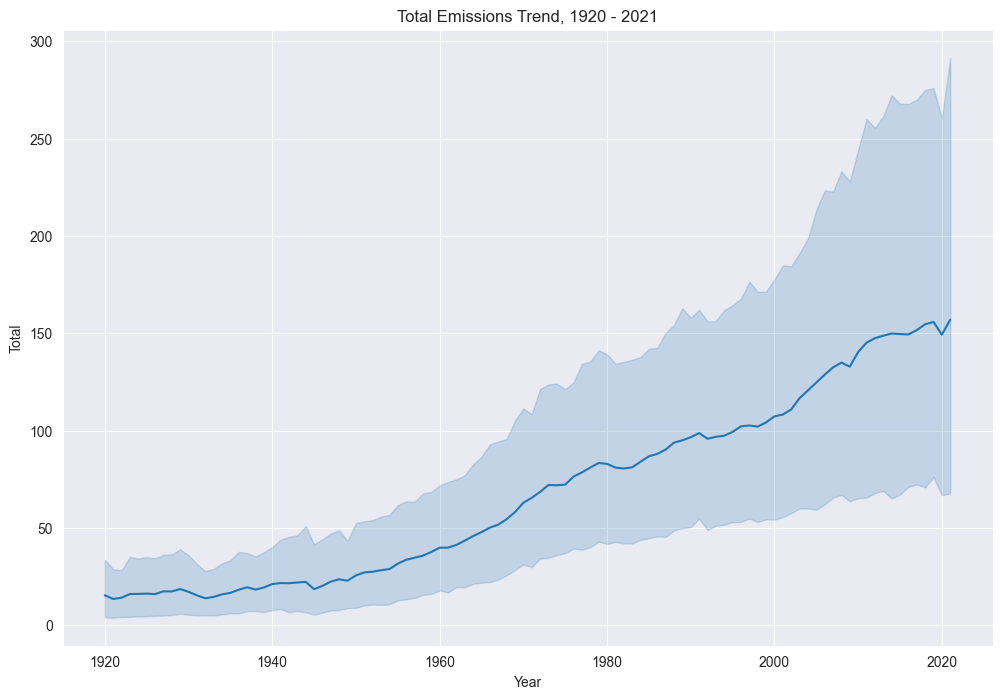

In [164]:
plt.figure(figsize=(12,8))
plt.title(label='Total Emissions Trend, 1920 - 2021')
sns.lineplot(data=full_countries_data[full_countries_data['Year']>='1920-01-01'], x='Year', y='Total')

Text(0.5, 1.0, 'Relationship between Coal and Oil emissions')

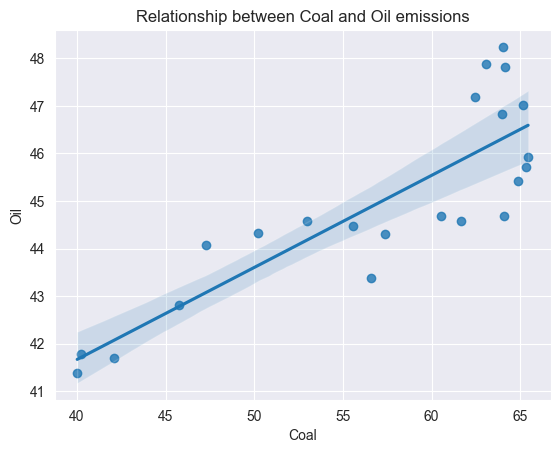

In [136]:
sns.regplot(data=annual_avg, x='Coal', y='Oil')
plt.title(label='Relationship between Coal and Oil emissions')

Text(0.5, 1.0, 'Relationship between Coal and Gas emissions')

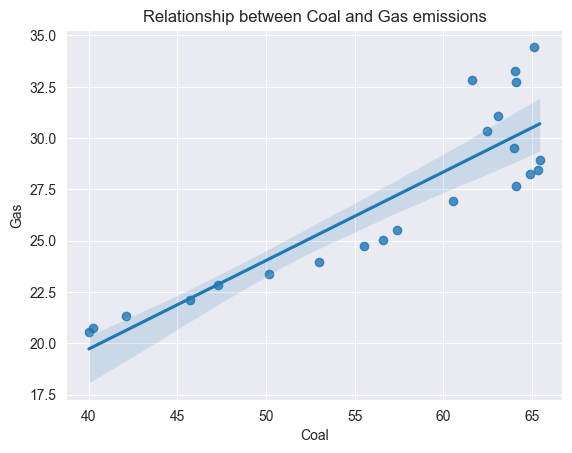

In [137]:
sns.regplot(data=annual_avg, x='Coal', y='Gas')
plt.title(label='Relationship between Coal and Gas emissions')

Text(0.5, 1.0, 'Relationship between Coal and Cement emissions')

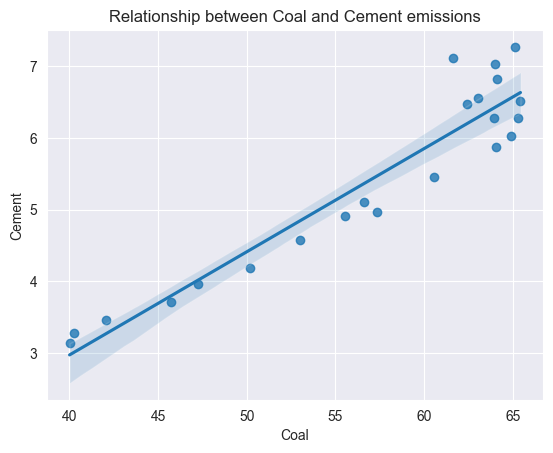

In [138]:
sns.regplot(data=annual_avg, x='Coal', y='Cement')
plt.title(label='Relationship between Coal and Cement emissions')

Text(0.5, 1.0, 'Relationship between Gas and Cement emissions')

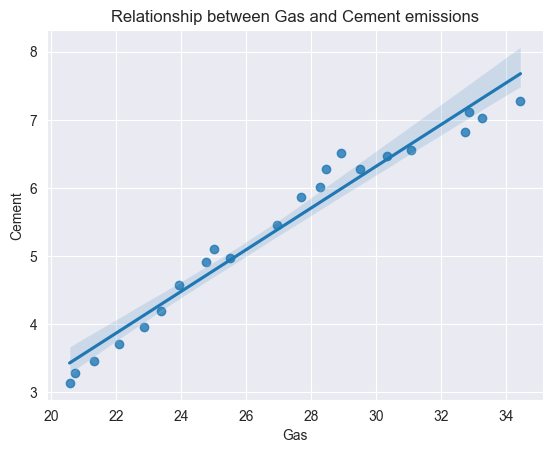

In [139]:
sns.regplot(data=annual_avg, x='Gas', y='Cement')
plt.title(label='Relationship between Gas and Cement emissions')

Text(0.5, 1.0, 'Relationship between Flaring and Cement emissions')

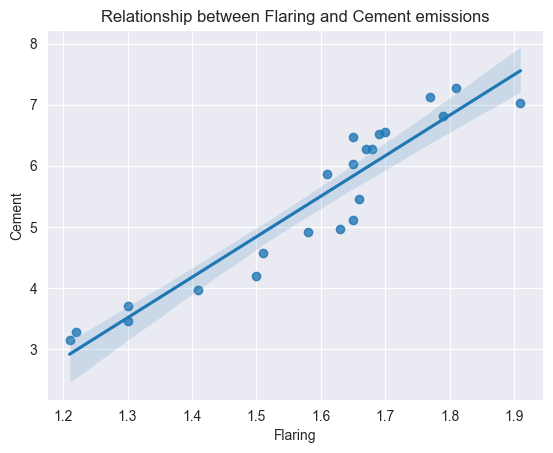

In [140]:
sns.regplot(data=annual_avg, x='Flaring', y='Cement')
plt.title(label='Relationship between Flaring and Cement emissions')

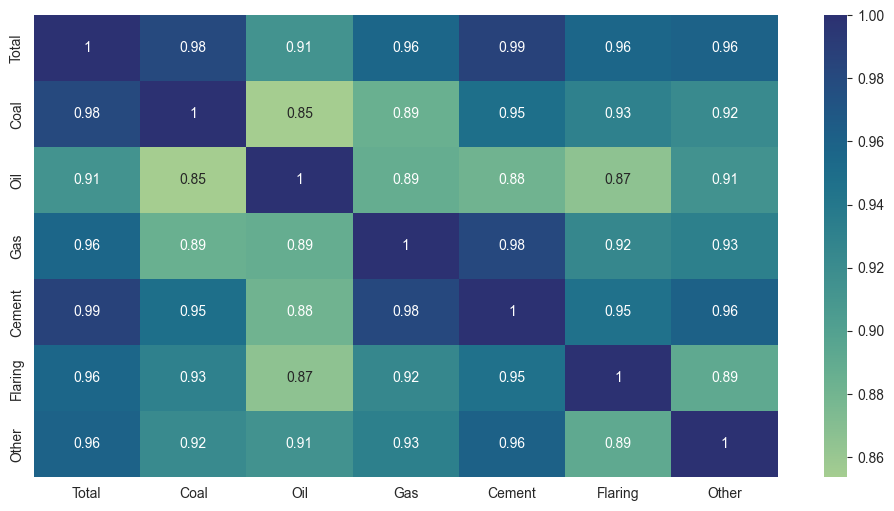

In [118]:
plt.figure(figsize=(12,6))
sns.heatmap(annual_avg.corr(), cmap='crest', annot=True)
plt.show()

What's interesting to notice here, is that the Total has a close correlation with Cement followed by Coal. Given that the overall emissions from Cement are at the lower end compared to the other fossil fuels, it's surprising to see such a close correlation with the Total.

Text(0.5, 1.0, 'Relationship between Cement and Total emissions')

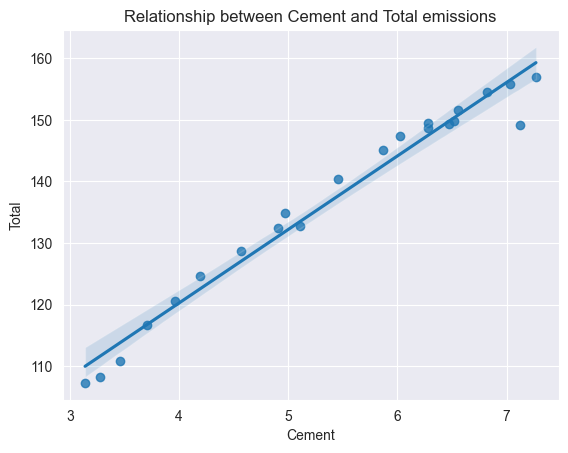

In [182]:
sns.regplot(data=annual_avg, x='Cement', y='Total')
plt.title(label='Relationship between Cement and Total emissions')

Text(0.5, 1.0, 'Relationship between Coal and Total emissions')

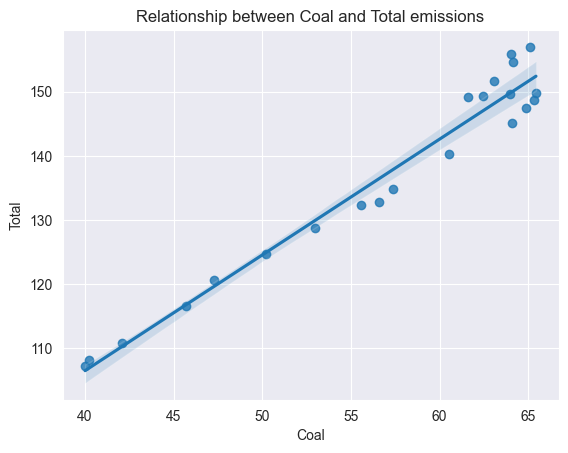

In [183]:
sns.regplot(data=annual_avg, x='Coal', y='Total')
plt.title(label='Relationship between Coal and Total emissions')

In [124]:
percapita_df = filtered_df.groupby('Country')[['Per Capita']].mean().sort_values('Per Capita', ascending=False).head(10).reset_index()
percapita_df

,Country,Per Capita
0,Qatar,45.763194
1,Curaçao,30.568303
2,Trinidad and Tobago,27.748401
3,Kuwait,27.003772
4,United Arab Emirates,24.215091
5,Bahrain,23.373379
6,Luxembourg,19.860752
7,Aruba,18.752751
8,Brunei Darussalam,18.739232
9,Sint Maarten (Dutch part),18.344077


Text(0.5, 1.0, 'Top 10 Countries by Total Emissions Per Capita, 2000 - 2021')

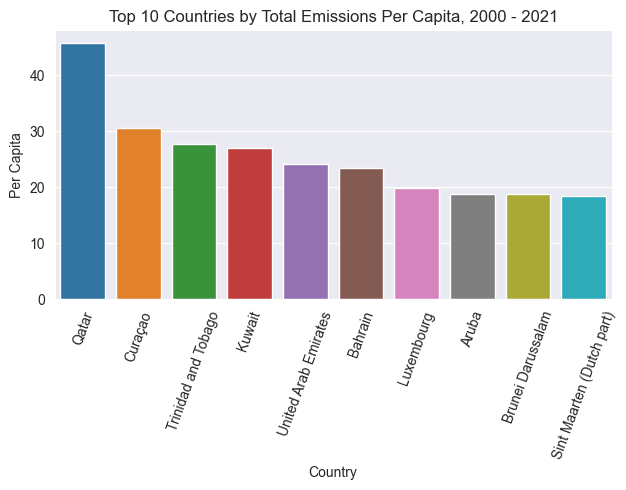

In [133]:
sns.barplot(percapita_df, x ='Country', y='Per Capita', hue='Country')
plt.xticks(rotation=70)
plt.tight_layout()
plt.title(label='Top 10 Countries by Total Emissions Per Capita, 2000 - 2021')

## Feature Engineering 

In order for a feature to be useful, it must have a relationship to the target that your model is able to learn (e.g. Linear models are only able to learn linear relationships). Hence, when using a linear model our goal is to transform the features to make their relationship to the target linear. 

To begin, let's consider the feature utility metric - mutual information (MI) which measures the relationship between a potential feature and the target. 

In [205]:
a.head()

,Year,Total,Coal,Oil,Gas,Cement,Flaring,Other,% Coal,% Oil,% Gas,% Cement,% Flaring,% Other
0,2000-12-31,107.26,40.01,41.38,20.57,3.14,1.21,0.94,37.30,38.58,19.18,2.93,1.13,0.88
1,2001-12-31,108.21,40.24,41.79,20.75,3.28,1.22,0.93,37.19,38.62,19.18,3.03,1.13,0.86
2,2002-12-31,110.80,42.08,41.69,21.33,3.46,1.30,0.94,37.98,37.63,19.25,3.12,1.17,0.85
3,2003-12-31,116.61,45.73,42.82,22.09,3.71,1.30,0.96,39.22,36.72,18.94,3.18,1.11,0.82
4,2004-12-31,120.58,47.27,44.08,22.86,3.96,1.41,1.00,39.20,36.56,18.96,3.28,1.17,0.83


In [241]:
X = a.copy()
y = X.pop('Total')


Scikit-learn has two MI metrics. We will use mutual_info_regression as it's suited to real-valued targets like our Total emissions column.

In [242]:
X.dtypes

Year         datetime64[ns]
Coal                float64
Oil                 float64
Gas                 float64
Cement              float64
Flaring             float64
Other               float64
% Coal              float64
% Oil               float64
% Gas               float64
% Cement            float64
% Flaring           float64
% Other             float64
dtype: object

In [243]:
#extract year only from datetime column 
X['year'] = X['Year'].dt.year


In [244]:
X = X.drop(columns=['Year'])

In [245]:
X.columns

Index(['Coal', 'Oil', 'Gas', 'Cement', 'Flaring', 'Other', '% Coal', '% Oil',
       '% Gas', '% Cement', '% Flaring', '% Other', 'year'],
      dtype='object')

In [246]:
#convert to int data type
X[['Coal', 'Oil', 'Gas', 'Cement', 'Flaring', 'Other', '% Coal',
       '% Oil', '% Gas', '% Cement', '% Flaring', '% Other', 'year']] = X[['Coal', 'Oil', 'Gas', 'Cement', 'Flaring', 'Other', '% Coal',
       '% Oil', '% Gas', '% Cement', '% Flaring', '% Other', 'year']].astype(int)

In [247]:
X.dtypes

Coal         int32
Oil          int32
Gas          int32
Cement       int32
Flaring      int32
Other        int32
% Coal       int32
% Oil        int32
% Gas        int32
% Cement     int32
% Flaring    int32
% Other      int32
year         int32
dtype: object

In [248]:
y

0     107.26
1     108.21
2     110.80
3     116.61
4     120.58
5     124.66
6     128.69
7     132.41
8     134.89
9     132.81
10    140.36
11    145.12
12    147.44
13    148.73
14    149.83
15    149.57
16    149.36
17    151.59
18    154.59
19    155.80
20    149.24
21    156.97
Name: Total, dtype: float64

In [249]:
discrete_features = X.dtypes == int

In [250]:
X

,Coal,Oil,Gas,Cement,Flaring,Other,% Coal,% Oil,% Gas,% Cement,% Flaring,% Other,year
0,40,41,20,3,1,0,37,38,19,2,1,0,2000
1,40,41,20,3,1,0,37,38,19,3,1,0,2001
2,42,41,21,3,1,0,37,37,19,3,1,0,2002
3,45,42,22,3,1,0,39,36,18,3,1,0,2003
4,47,44,22,3,1,1,39,36,18,3,1,0,2004
5,50,44,23,4,1,1,40,35,18,3,1,0,2005
6,52,44,23,4,1,1,41,34,18,3,1,0,2006
7,55,44,24,4,1,1,41,33,18,3,1,0,2007
8,57,44,25,4,1,1,42,32,18,3,1,0,2008
9,56,43,25,5,1,1,42,32,18,3,1,0,2009


In [253]:
y = y.astype(int)

In [254]:
y.dtypes

dtype('int32')

In [255]:
discrete_features

Coal         True
Oil          True
Gas          True
Cement       True
Flaring      True
Other        True
% Coal       True
% Oil        True
% Gas        True
% Cement     True
% Flaring    True
% Other      True
year         True
dtype: bool

In [256]:
from sklearn.feature_selection import mutual_info_regression

def make_mi_scores(X, y, discrete_features):
    mi_scores = mutual_info_regression(X, y, discrete_features=discrete_features)
    mi_scores = pd.Series(mi_scores, name='MI Scores', index=X.columns)
    mi_scores = mi_scores.sort_values(ascending=False)
    return mi_scores

mi_scores = make_mi_scores(X, y, discrete_features)
mi_scores[::3]

ValueError: Found array with 0 sample(s) (shape=(0, 1)) while a minimum of 1 is required.

In [22]:
smalldf = data[['Country', 'ISO 3166-1 alpha-3']]
smalldf

,Country,ISO 3166-1 alpha-3
0,Afghanistan,AFG
1,Afghanistan,AFG
2,Afghanistan,AFG
3,Afghanistan,AFG
4,Afghanistan,AFG
...,...,...
63099,Global,WLD
63100,Global,WLD
63101,Global,WLD
63102,Global,WLD
